In [1]:
from keras.datasets import mnist
from keras.datasets import fashion_mnist
from keras.layers import Dense
from keras.models import Sequential
from keras.utils.np_utils import to_categorical
from matplotlib import pyplot as plt

In [2]:
# Setup train and test splits
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

Training data shape:  (60000, 28, 28)


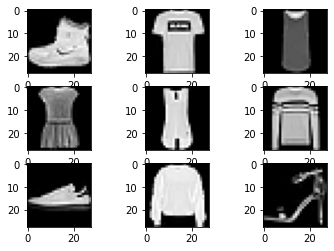

In [3]:
# Inspect train data
print("Training data shape: ", x_train.shape)  # (60000, 28, 28) -- 60000 images, each 28x28 pixels

# Show the first few train images as a plot
for i in range(9):
    plt.subplot(330 + 1 + i)  # Define subplot
    plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))  # Plot raw pixel data
plt.show()

Test data shape:  (10000, 28, 28)


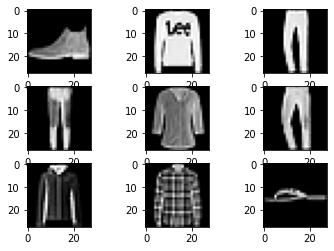

In [4]:
# Inspect test data
print("Test data shape: ", x_test.shape)  # (10000, 28, 28) -- 10000 images, each 28x28 pixels

# Show the first few test images as a plot
for i in range(9):
    plt.subplot(330 + 1 + i)  # Define subplot
    plt.imshow(x_test[i], cmap=plt.get_cmap('gray'))  # Plot raw pixel data
plt.show()

In [5]:
# Inspect labels
print("Training labels shape: ", y_train.shape)  # (60000, 28, 28) -- 60000 numbers from the range 0, 1, ... 9
print("Test labels shape: ", y_test.shape)  # (10000, 28, 28) -- 10000 numbers from the range 0, 1, ... 9
print("First 10 training labels: ", y_train[:10])
print("First 10 test labels: ", y_test[:10])

Training labels shape:  (60000,)
Test labels shape:  (10000,)
First 10 training labels:  [9 0 0 3 0 2 7 2 5 5]
First 10 test labels:  [9 2 1 1 6 1 4 6 5 7]


In [6]:
# Flatten the images
image_vector_size = 28*28
x_train = x_train.reshape(x_train.shape[0], image_vector_size)
x_test = x_test.reshape(x_test.shape[0], image_vector_size)

In [7]:
# Re-inspect data shapes
# 28 * 28 = 784
print("Training data shape: ", x_train.shape)  # (60000, 784) -- 60000 images, each a flat series of 784 pixels
print("Test data shape: ", x_test.shape)  # (10000, 784) -- 10000 images, a flat series of 784 pixels

Training data shape:  (60000, 784)
Test data shape:  (10000, 784)


In [8]:
# Convert to "one-hot" vectors using the to_categorical function
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [9]:
# Re-inspect train labels
print("First 10 training labels as one-hot encoded vectors:\n", y_train[:10])

First 10 training labels as one-hot encoded vectors:
 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


In [10]:
# Re-inspect test labels
print("First 10 test labels as one-hot encoded vectors:\n", y_test[:10])

First 10 test labels as one-hot encoded vectors:
 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


In [16]:
# Define a neural network model
image_size = 784
num_classes = 10

model = Sequential()  # Documentation: https://keras.io/models/sequential/

# The input layer requires the special input_shape parameter which should match
# the shape of our training data.
model.add(Dense(units=32, activation='sigmoid', input_shape=(image_size,)))  # Dense = fully connected layers
model.add(Dense(units=num_classes, activation='softmax'))
model.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 32)                25120     
                                                                 
 dense_3 (Dense)             (None, 10)                330       
                                                                 
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


In [23]:
# Train the model and keep track of progress
history = model.fit(x_train, y_train, batch_size=128, epochs=80, verbose=False, validation_split=.1)

In [24]:
# Evaluate the model
loss, accuracy  = model.evaluate(x_test, y_test, verbose=False)

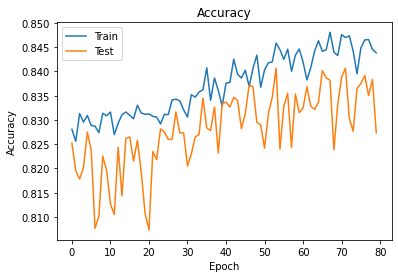

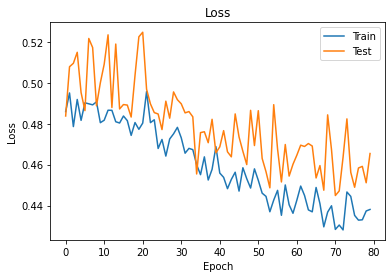

Final test loss: 0.4932722747325897
Final test accuracy: 0.826200008392334


In [25]:
# Display the results
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

print('Final test loss:', loss)
print('Final test accuracy:', accuracy)